In [1]:
!pip install matplotlib pandas

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline



In [10]:
with open('/Users/bishwajit/PycharmProjects/hll_trial_000/test_result_files/continuous_test_data_180k_00.json') as fp:
    data: list[dict] = json.load(fp)

In [11]:
len(data)

188772

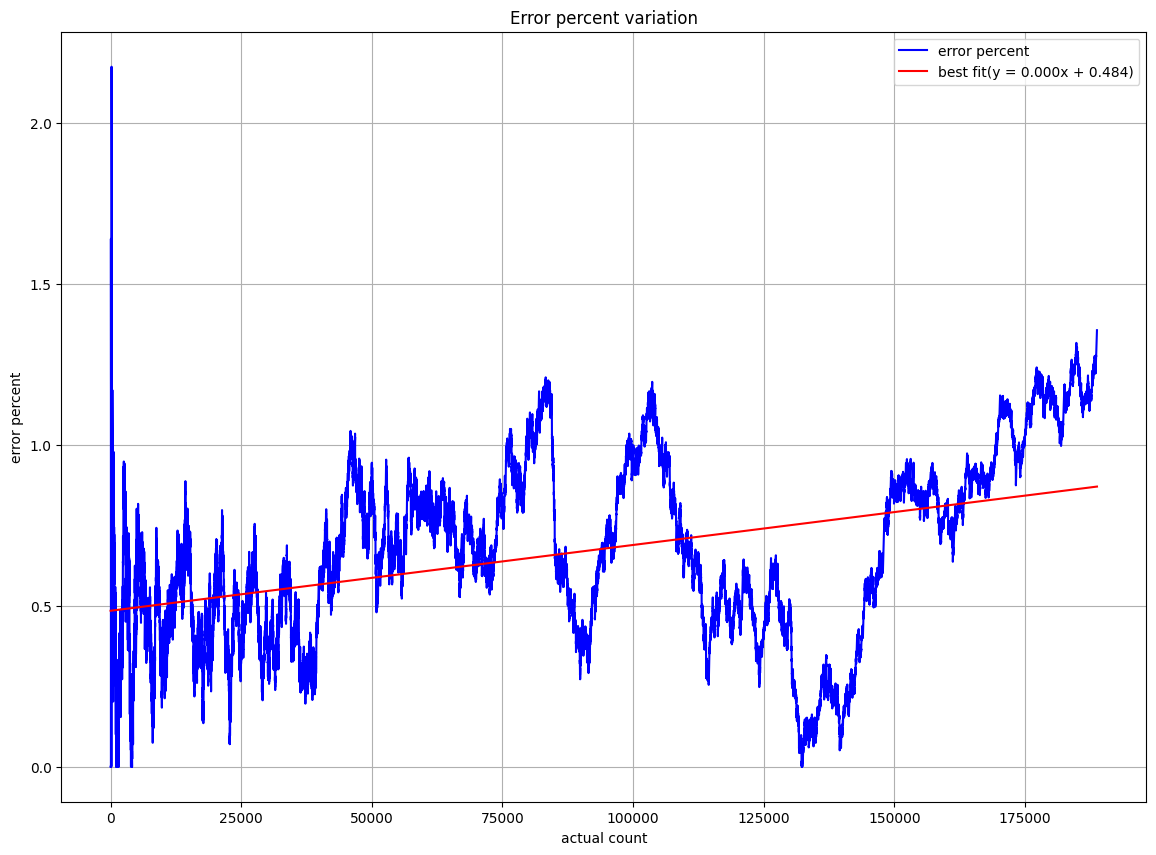

In [12]:
x = [i['actual_count'] for i in data]
y = [i['percent_diff'] for i in data]

# best-fit
co_effs = np.polyfit(x, y, 1)
y_fit = np.polyval(co_effs, x)

plt.figure(figsize=(14, 10))
plt.plot(
    x,
    y,
    label="error percent", color="blue")

plt.plot(x, y_fit, color='red', label=f'best fit(y = {co_effs[0]:.3f}x + {co_effs[1]:.3f})')
plt.xlabel("actual count")
plt.ylabel("error percent")
plt.title("Error percent variation")
plt.legend()
plt.grid()
plt.show()


In [13]:
co_effs

array([2.04256285e-06, 4.84421583e-01])

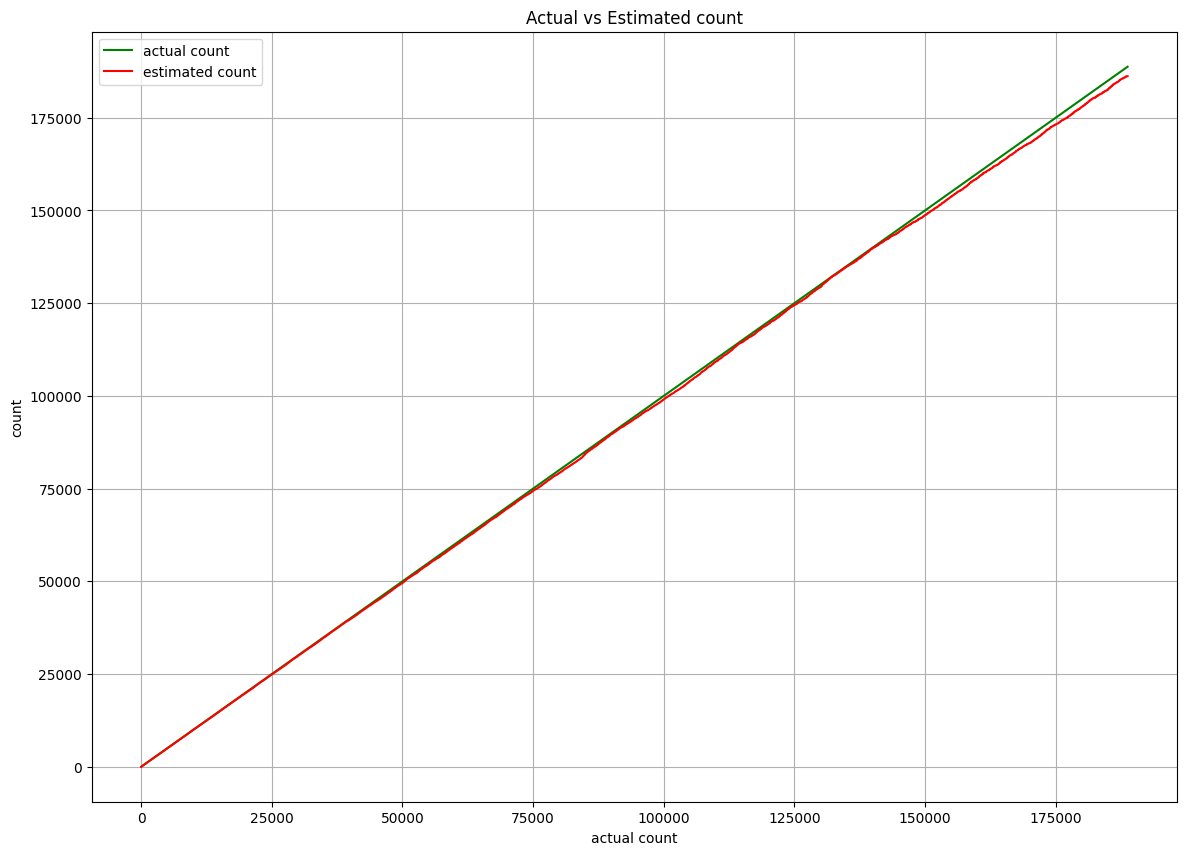

In [14]:
y1 = [i['actual_count'] for i in data]
y2 = [i['estimated_count'] for i in data]
x1=y1


plt.figure(figsize=(14, 10))
plt.plot(x,y1,label="actual count", color="green")
plt.plot(x,y2,label="estimated count", color="red")

plt.xlabel("actual count")
plt.ylabel("count")
plt.title("Actual vs Estimated count")
plt.legend()
plt.grid()
plt.show()


In [15]:
df = pd.DataFrame(data)

df.percent_diff.describe()

count    188772.000000
mean          0.677212
std           0.281630
min           0.000000
25%           0.469870
50%           0.667350
75%           0.881282
max           2.173910
Name: percent_diff, dtype: float64